## ***Import Important Libraries***

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings 
warnings.filterwarnings('ignore')

In [3]:
Sales_df = pd.read_csv("Sales data.csv")
Sales_df

,Date,SalesRep,Product,Units,Price,Total Sales,City,State,Region,Day
0,1/1/2013,Isabel Cross,Nestle Aero Mint Potz,4,495,1980,Ranchi,Jharkhand,East,Tuesday
1,1/2/2013,Cecilia Manning,Nestle Smarties Pop-Up,2,438,876,Trivandrum,Kerala,South,Wednesday
2,1/2/2013,Isabel Cross,Nestle Maxibon Cookie,1,426,426,Ranchi,Jharkhand,East,Wednesday
3,1/2/2013,Shari Silva,Nestle Maxibon Cookie,2,260,520,Mysore,Karnataka,South,Wednesday
4,1/2/2013,Trevor Jones,Nestle Toffee Crumble,4,285,1140,Pune,Maharashtra,West,Wednesday
...,...,...,...,...,...,...,...,...,...,...
9995,12/31/2014,Cecilia Manning,Nestle Maxibon Cookie,2,430,860,Trivandrum,Kerala,South,Wednesday
9996,12/31/2014,Ben Perez,Nestle Aero Mint Potz,3,173,519,Goa,Goa,West,Wednesday
9997,12/31/2014,Jaime Pearson,Nestle Milky Bar Stick,1,435,435,Jodhpur,Rajasthan,North,Wednesday
9998,12/31/2014,Fernando Rowe,Nestle Smarties Pop-Up,2,486,972,Ahmedabad,Gujarat,West,Wednesday


## ***Get Summary OF The Data***

In [5]:
Sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         10000 non-null  object
 1   SalesRep     10000 non-null  object
 2   Product      10000 non-null  object
 3   Units        10000 non-null  int64 
 4   Price        10000 non-null  int64 
 5   Total Sales  10000 non-null  int64 
 6   City         10000 non-null  object
 7   State        10000 non-null  object
 8   Region       10000 non-null  object
 9   Day          10000 non-null  object
dtypes: int64(3), object(7)
memory usage: 781.4+ KB


## ***Total Sales By City***

In [119]:
df2 = Sales_df.groupby(['City'])['Total Sales'].sum()

# Convert Series to DataFrame
df2 = df2.reset_index()
df2

,City,Total Sales
0,Agra,259971
1,Ahmedabad,517965
2,Bangalore,171788
3,Cochin,318710
4,Darjeeling,231032
5,Delhi,1764426
6,Durgapur,188769
7,Goa,652865
8,Hyderabad,326784
9,Jodhpur,143611


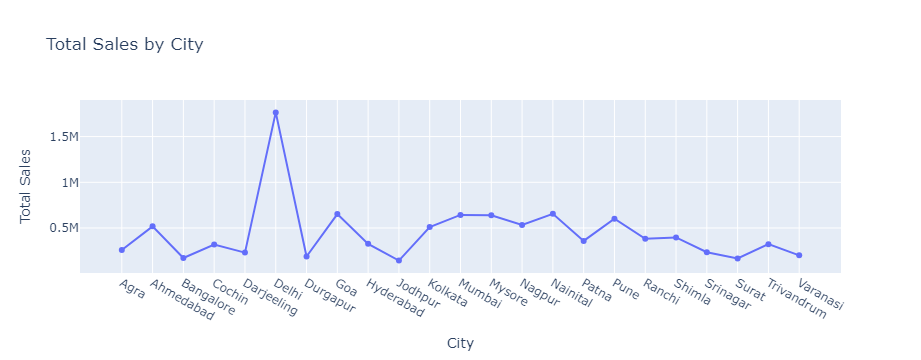

In [146]:
fig = px.line(df2,x = 'City', y = 'Total Sales', title = "Total Sales by City", markers=True)
fig.show()

## ***Sold Units By Products***

In [131]:
df3 = Sales_df.groupby(['Product'])['Units'].sum().sort_values(ascending=False).reset_index().rename(columns = {"Units":"Sold Units"})
df3

,Product,Sold Units
0,Nestle Smarties Pop-Up,5267
1,Nestle Fab,4375
2,Nestle Aero Mint Potz,4262
3,Nestle Milky Bar Stick,4153
4,Nestle Toffee Crumble,3586
5,Nestle Rowntree Fruit Pastil,3258
6,Nestle Rolo Potz,2498
7,Nestle Maxibon Cookie,2152
8,Nestle Kit Kat Cone,2101
9,Nestle Nobbly Bobbly,1253


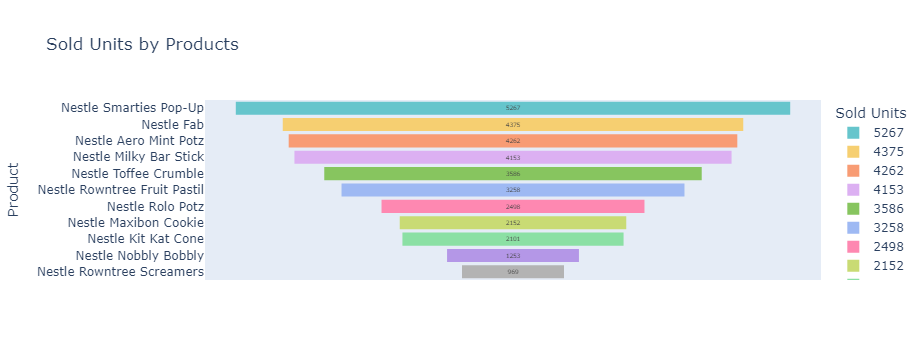

In [144]:
fig = px.funnel(df3, x = 'Sold Units', y = "Product",title="Sold Units by Products", color = 'Sold Units',
               color_discrete_sequence=px.colors.qualitative.Pastel)
fig

## ***Total Sales By States***

In [137]:
df4 = Sales_df.groupby(['State'])['Total Sales'].sum().reset_index()
df4 

,State,Total Sales
0,Bihar,359030
1,Delhi,1764426
2,Goa,652865
3,Gujarat,685672
4,Himachal Pradesh,396905
5,Jammu and Kashmir,234890
6,Jharkhand,382835
7,Karnataka,811461
8,Kerala,642484
9,Maharashtra,1779810


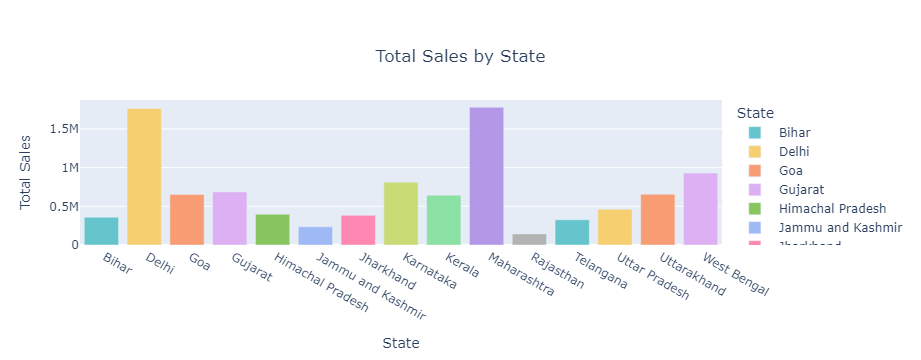

In [152]:
# Create Bar Chart with different colors for each bar
fig = px.bar(df4, x='State', y='Total Sales', title="Total Sales by State",
             color='State',  # This assigns different colors based on the 'State'
             color_discrete_sequence=px.colors.qualitative.Pastel)  # Customize color palette

# Center the title and adjust layout
fig.update_layout(
    title={
        'text': "Total Sales by State",
        'x': 0.5,   # Center the title
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

# Show the plot
fig.show()


## ***Find KPI's***

## ***Sales Target Achievement*** 

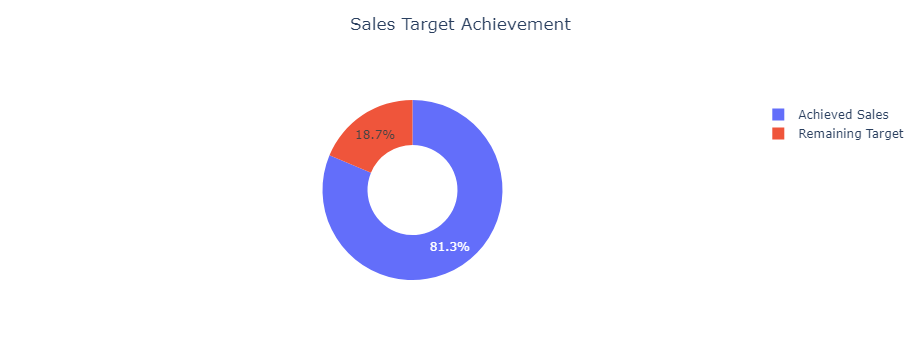

In [154]:
Target_Sale = 12578748.75
Achieved_Sales_Amount = 10226625

# Calculate the percentage of achieved sales
Achieved_Sales = round((Achieved_Sales_Amount / Target_Sale) * 100, 1)

# Calculate the remaining target percentage
Remaining_Target = round(100 - Achieved_Sales, 1)

# Create data for the donut chart
labels = ['Achieved Sales', 'Remaining Target']
values = [Achieved_Sales, Remaining_Target]

# Create the Donut Chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.5)])

# Customize the layout
fig.update_layout(
    title={
        'text': "Sales Target Achievement",
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    showlegend=True
)

# Display the chart
fig.show()


## ***Units Sold Target Achievement***

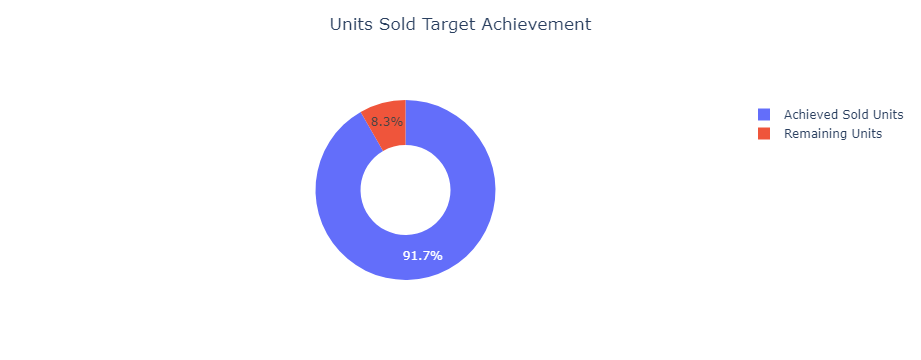

In [155]:
# Given Target Units
Target_Units = 36923

# Calculate the total actual units sold
Actual_units = sum(Sales_df['Units'])

# Calculate the percentage of sold units
Achieved_Sold_Units = round((Actual_units / Target_Units) * 100, 1)

# Calculate the remaining units to reach the target
Remaining_Units = round(100 - Achieved_Sold_Units, 1)

# Create data for the donut chart
labels = ['Achieved Sold Units', 'Remaining Units']
values = [Achieved_Sold_Units, Remaining_Units]

# Create the Donut Chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.5)])

# Customize the layout
fig.update_layout(
    title={
        'text': "Units Sold Target Achievement",
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    showlegend=True
)

# Display the chart
fig.show()

## ***Target Cities Achievement***

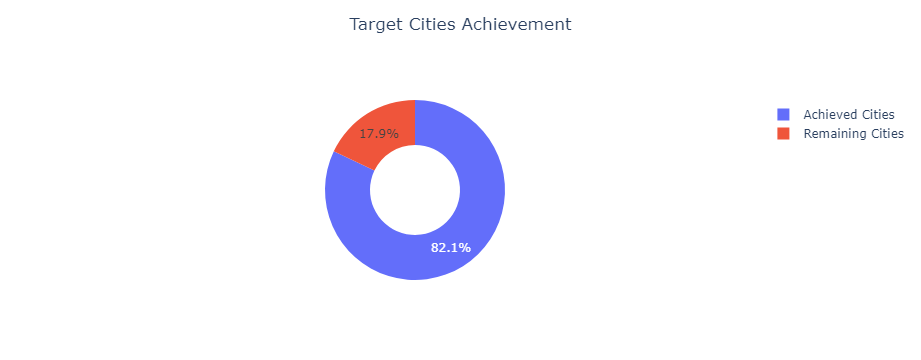

In [157]:
# Given Target Cities
Target_Cities = 28

# Calculate the actual number of unique cities
Actual_Cities = len(Sales_df.groupby(['City']))

# Calculate the percentage of achieved cities
Achieved_cities_per = round((Actual_Cities / Target_Cities) * 100, 1)


# Calculate the remaining percentage of cities to achieve the target
Remaining_cities_per = round(100 - Achieved_cities_per, 1)

# Create data for the donut chart
labels = ['Achieved Cities', 'Remaining Cities']
values = [Achieved_cities_per, Remaining_cities_per]

# Create the Donut Chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.5)])

# Customize the layout
fig.update_layout(
    title={
        'text': "Target Cities Achievement",
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    showlegend=True
)

# Display the chart
fig.show()

***This project provides insights into sales performance across different dimensions: overall sales, unit sales, and geographic coverage. By creating and analyzing donut charts, you can visually assess progress towards meeting sales targets, evaluate how close you are to achieving unit sales goals, and understand city coverage effectiveness.***